### Prepare model for Glass Classification
### KNN Classification Model

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [53]:
# Reading the dataset
data=pd.read_csv("D:\ExcelR Data Science\Assignments\KNN\glass.csv")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [54]:
data.shape

(214, 10)

#### Review on General properties

In [57]:
data.isnull().any().sum()

0

In [58]:
data[data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [59]:
data.shape

(214, 10)

In [60]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [61]:
data['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

<AxesSubplot:xlabel='Type', ylabel='Count'>

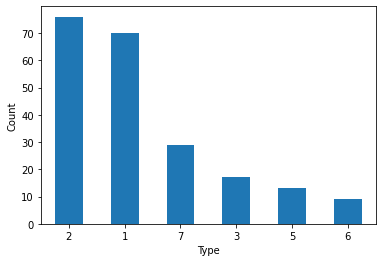

In [62]:
#sns.barplot(data=data,hue="Type",y="RI",kind="count")
data['Type'].value_counts().plot(kind='bar', xlabel='Type', ylabel='Count', rot=0)

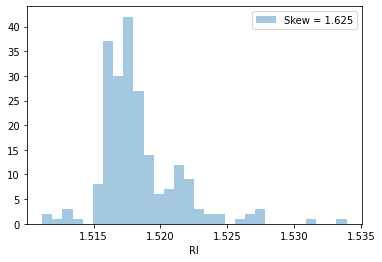

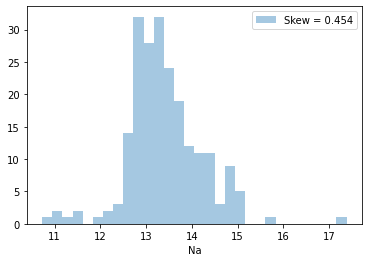

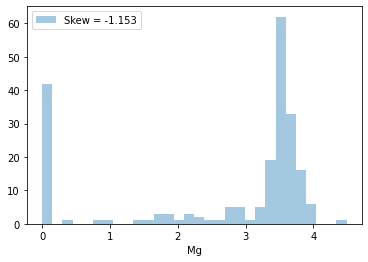

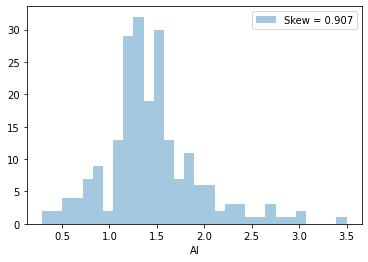

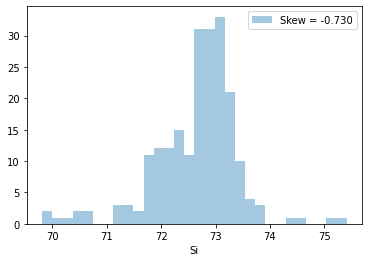

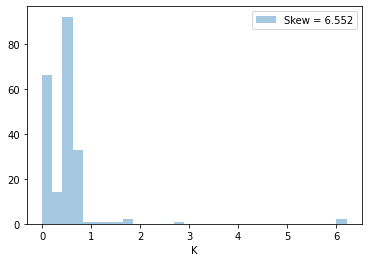

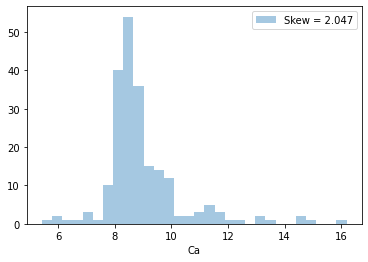

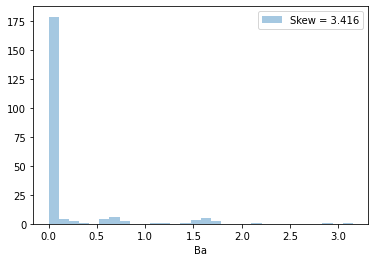

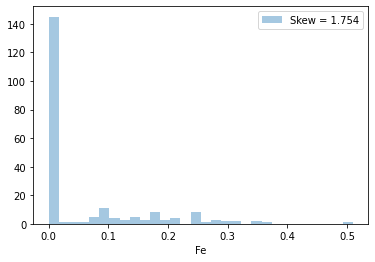

In [63]:
for i in data.columns[:-1]:
    skew = data[i].skew()
    sns.distplot(data[i], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

<AxesSubplot:>

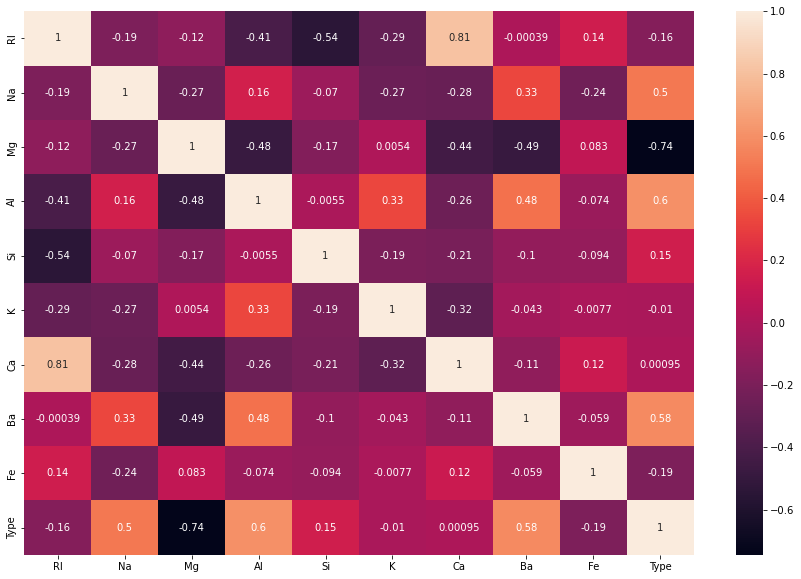

In [64]:
plt.figure(figsize=(15,10))

sns.heatmap(data.corr(),annot=True)

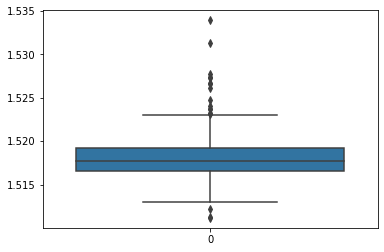

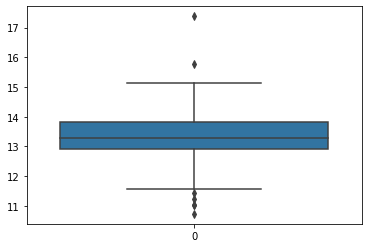

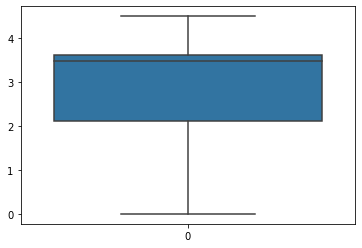

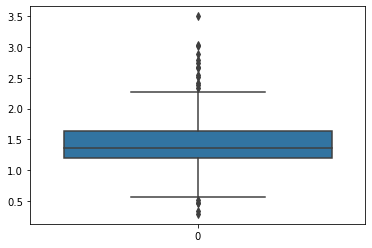

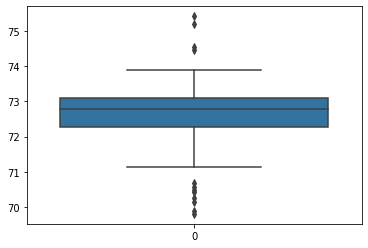

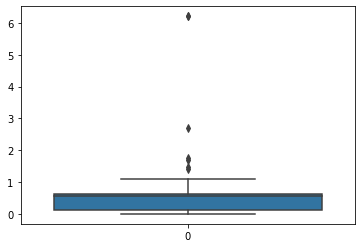

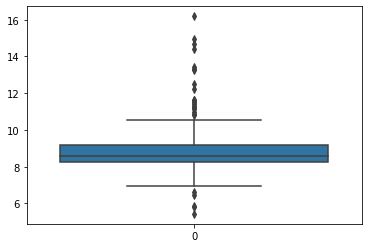

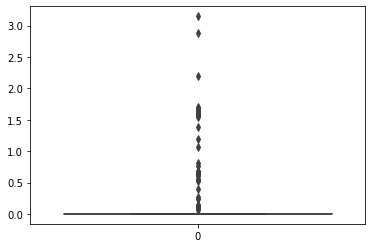

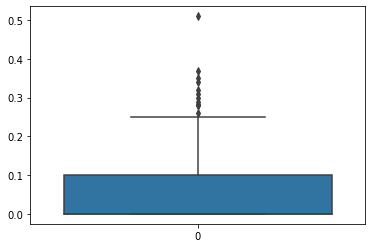

In [65]:
for i in data.columns[:-1]:
    sns.boxplot(data=data[i])
    #plt.xlabel(data[i].columns)
    plt.show()


In [94]:
from collections import Counter
def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(data))))   

The dataset contains 25 observations with more than 2 outliers


In [95]:
outlier_indices = outlier_hunt(data)
data = data.drop(outlier_indices).reset_index(drop=True)
print(data.shape)

(189, 10)


In [96]:
data.shape

(189, 10)

In [97]:
X=data.iloc[:,0:9]
Y=data['Type']
print(X.shape)
print(Y.shape)

(189, 9)
(189,)


In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30,
                                                 random_state=42)
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [99]:
y_pred=classifier.predict(x_test)

In [100]:
from sklearn import metrics

matrix=metrics.confusion_matrix(y_test,y_pred)

#matrix

In [101]:
score=metrics.accuracy_score(y_test,y_pred)
print('the accuracy of this model is: ',score)
print(metrics.classification_report(y_test,y_pred))

the accuracy of this model is:  0.6842105263157895
              precision    recall  f1-score   support

           1       0.71      0.65      0.68        26
           2       0.71      0.75      0.73        20
           3       0.20      0.25      0.22         4
           5       1.00      0.75      0.86         4
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         2

    accuracy                           0.68        57
   macro avg       0.69      0.73      0.69        57
weighted avg       0.70      0.68      0.69        57



## Improving the model

In [ ]:
# standarding the dataset

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:

sd=StandardScaler()
sd.fit_transform(x_train)
sd.fit_transform(x_test)

array([[-8.22679607e-01,  2.80129272e+00, -2.48204463e+00,
         1.79443016e+00,  8.17126062e-01, -2.14505595e+00,
        -3.20979483e-01,  4.87613884e+00, -7.28024239e-01],
       [ 2.19781346e+00,  3.07690143e-01, -2.48204463e+00,
         7.96384045e-01, -7.58427154e-01, -6.51133822e-01,
         2.61457624e+00, -1.97367524e-01, -7.28024239e-01],
       [ 2.87059557e-01,  1.07239493e+00,  6.08663516e-01,
        -5.80231287e-01, -9.35455606e-01, -1.86494555e+00,
        -1.40076889e-01, -1.97367524e-01, -7.28024239e-01],
       [-3.38733205e-01, -7.39622940e-01,  4.51227980e-01,
        -4.08154370e-01,  1.04726305e+00,  5.62677907e-01,
        -5.51219147e-01, -1.97367524e-01, -7.28024239e-01],
       [ 1.29249993e+00, -3.40646528e-01,  5.42374870e-01,
        -1.64710817e+00, -5.81398703e-01, -1.25803969e+00,
         6.49316248e-01, -1.97367524e-01,  1.00955085e+00],
       [ 2.00546452e-02, -2.57526442e-01,  8.07529456e-01,
        -5.45815903e-01, -3.68964562e-01,  6.560480

In [104]:
# KNeighbor =sqrt of no.of.samples
n=len(data)
k=round(np.sqrt(n))
classifier=KNeighborsClassifier(n_neighbors=k)
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [105]:
y_pred=classifier.predict(x_test)

In [106]:
print("Model Accuracy:\n",metrics.accuracy_score(y_test,y_pred))
print("Classification report:\n",metrics.classification_report(y_test,y_pred))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_pred))

Model Accuracy:
 0.7017543859649122
Classification report:
               precision    recall  f1-score   support

           1       0.80      0.77      0.78        26
           2       0.64      0.70      0.67        20
           3       0.00      0.00      0.00         4
           5       0.80      1.00      0.89         4
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         2

    accuracy                           0.70        57
   macro avg       0.54      0.58      0.56        57
weighted avg       0.68      0.70      0.69        57

Confusion Matrix:
 [[20  5  1  0  0  0]
 [ 3 14  0  1  2  0]
 [ 1  3  0  0  0  0]
 [ 0  0  0  4  0  0]
 [ 1  0  0  0  0  0]
 [ 0  0  0  0  0  2]]


### Finding the optimum value of k

In [107]:


error_rate=[]#list that will store the average error rate value of k
for i in range (1,31):  #Took the range of k from 1 to 30
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train,y_train)
    predict_i=clf.predict(x_test)
    error_rate.append(np.mean(predict_i!=y_test))
    
#error_rate

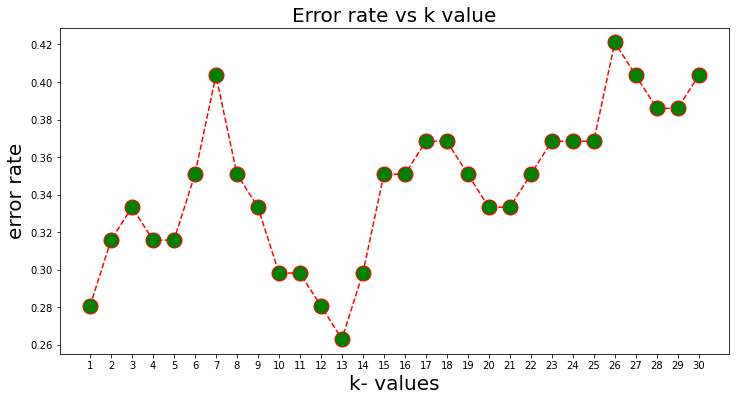

In [108]:
plt.figure(figsize=(12,6))
plt.plot(range(1,31),error_rate,marker="o",markerfacecolor="green",
         linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k- values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1,31))
plt.show()

In [109]:

# i chose K17 there is slight fluctuations
classifier=KNeighborsClassifier(n_neighbors=17)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [110]:
print("Model Accuracy:\n",metrics.accuracy_score(y_test,y_pred))
print("Classification report:\n",metrics.classification_report(y_test,y_pred))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_pred))

Model Accuracy:
 0.631578947368421
Classification report:
               precision    recall  f1-score   support

           1       0.78      0.69      0.73        26
           2       0.52      0.75      0.61        20
           3       0.00      0.00      0.00         4
           5       1.00      0.25      0.40         4
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         2

    accuracy                           0.63        57
   macro avg       0.55      0.45      0.46        57
weighted avg       0.64      0.63      0.61        57

Confusion Matrix:
 [[18  8  0  0  0  0]
 [ 3 15  0  0  2  0]
 [ 1  3  0  0  0  0]
 [ 0  3  0  1  0  0]
 [ 1  0  0  0  0  0]
 [ 0  0  0  0  0  2]]


In [111]:
# Robust Scaling to handle the presences of outliers in our data.
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
scaler.fit(X)
scaler.transform(X)

array([[ 1.30923695,  0.48148148,  1.34722222, ...,  0.18888889,
         0.        ,  0.        ],
       [-0.0562249 ,  0.79012346,  0.11111111, ..., -0.83333333,
         0.        ,  0.        ],
       [-0.63052209,  0.34567901,  0.04166667, ..., -0.88888889,
         0.        ,  0.        ],
       ...,
       [ 1.16465863,  1.37037037, -4.88888889, ..., -0.15555556,
         1.64      ,  0.        ],
       [-0.49799197,  1.39506173, -4.88888889, ..., -0.11111111,
         1.57      ,  0.        ],
       [-0.25702811,  1.20987654, -4.88888889, ...,  0.04444444,
         1.67      ,  0.        ]])

In [112]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,
                                                 random_state=42)
classifier=KNeighborsClassifier(n_neighbors=17)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [113]:
print("Model Accuracy:\n",metrics.accuracy_score(y_test,y_pred))
print("Classification report:\n",metrics.classification_report(y_test,y_pred))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_pred))

Model Accuracy:
 0.7105263157894737
Classification report:
               precision    recall  f1-score   support

           1       0.78      0.82      0.80        17
           2       0.59      0.91      0.71        11
           3       0.00      0.00      0.00         4
           5       1.00      0.33      0.50         3
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         2

    accuracy                           0.71        38
   macro avg       0.56      0.51      0.50        38
weighted avg       0.65      0.71      0.66        38

Confusion Matrix:
 [[14  3  0  0  0  0]
 [ 1 10  0  0  0  0]
 [ 2  2  0  0  0  0]
 [ 0  2  0  1  0  0]
 [ 1  0  0  0  0  0]
 [ 0  0  0  0  0  2]]


In [114]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)
scaler.transform(X)

array([[0.56722151, 0.63349515, 1.        , ..., 0.22814208, 0.        ,
        0.        ],
       [0.34955186, 0.69417476, 0.80178174, ..., 0.10245902, 0.        ,
        0.        ],
       [0.25800256, 0.60679612, 0.79064588, ..., 0.09562842, 0.        ,
        0.        ],
       ...,
       [0.54417414, 0.80825243, 0.        , ..., 0.18579235, 0.95906433,
        0.        ],
       [0.27912932, 0.8131068 , 0.        , ..., 0.19125683, 0.91812865,
        0.        ],
       [0.31754161, 0.77669903, 0.        , ..., 0.21038251, 0.97660819,
        0.        ]])

In [115]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,
                                                 random_state=42)
classifier=KNeighborsClassifier(n_neighbors=17)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [116]:
print("Model Accuracy:\n",metrics.accuracy_score(y_test,y_pred))
print("Classification report:\n",metrics.classification_report(y_test,y_pred))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_pred))

Model Accuracy:
 0.7105263157894737
Classification report:
               precision    recall  f1-score   support

           1       0.78      0.82      0.80        17
           2       0.59      0.91      0.71        11
           3       0.00      0.00      0.00         4
           5       1.00      0.33      0.50         3
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         2

    accuracy                           0.71        38
   macro avg       0.56      0.51      0.50        38
weighted avg       0.65      0.71      0.66        38

Confusion Matrix:
 [[14  3  0  0  0  0]
 [ 1 10  0  0  0  0]
 [ 2  2  0  0  0  0]
 [ 0  2  0  1  0  0]
 [ 1  0  0  0  0  0]
 [ 0  0  0  0  0  2]]


### GridCV to Tune Hyperparameters of my KNN model.

In [117]:
from sklearn.model_selection import GridSearchCV
k_range=list(range(1,31))
param_grid=dict(n_neighbors=k_range)

# defining parameter range
grid=GridSearchCV(classifier,param_grid,cv=10,scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(x_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [118]:
print(grid_search.best_params_)

{'n_neighbors': 1}


In [119]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 69.46%
